# 7 Sparse Kernl Machines

## 7.2. Relevance Vector Machines

## 7.2.1 RVM for regression

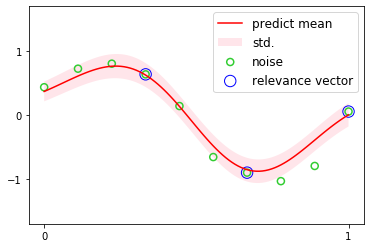

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

def func(x):
    return np.sin(2 * np.pi * x)

def generate_noise_data(n_sample):
    x = np.linspace(0, 1, n_sample)
    t = func(x) + np.random.normal(scale=0.2, size=n_sample)
    return x,t


x_train, y_train = generate_noise_data(10)
x = np.linspace(0, 1, 100)


'''---- Learning ----'''
model = RVM_regression(kernel=GaussianKernel(1., 20.))
model.fit(x_train, y_train)
y, y_std = model.predict(x, get_std=True)


# plot the test data
plt.plot(x, y, color='red', label="predict mean")
plt.fill_between(x, y + y_std, y - y_std, facecolor='pink', alpha=0.4, label="std.")

# plot the training data
plt.scatter(x_train, y_train, facecolor="none", edgecolor="limegreen", label="noise", s=50, linewidth=1.5)
plt.scatter(*model.relevance_vector.values(), s=130, facecolor="none", edgecolor="b", label="relevance vector")

# config for drawing
plt.legend(fontsize=12)
plt.xlim(-0.05, 1.05)
plt.ylim(-1.7, 1.7)
plt.xticks([0,1])
plt.yticks([-1,0,1])
plt.show()

## 7.2.3 RVM for classification

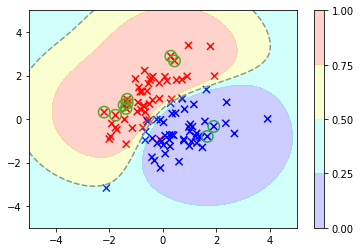

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import *

n_sample = 50

def generate_noise_data(N):
    correlation= [0.9, 0.5]
    cov = [correlation, np.flip(correlation)]
    cls1 = np.random.multivariate_normal([-0.5,1], cov, int(N)).T
    cls2 = np.random.multivariate_normal([1,-0.5], cov, int(N)).T
    t = np.hstack((np.ones(cls1.shape[1]),np.zeros(cls2.shape[1])))
    return np.c_[cls1, cls2].T, t



X_train, t_train = generate_noise_data(n_sample)
X,Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
X_test = np.array([X.ravel(), Y.ravel()]).reshape(2,-1).T


''' Learning '''
model = RVM_classifier(kernel=GaussianKernel(1, 0.5))
model.fit(X_train, t_train)
Z = model.predict(X_test)

# plotting training data
plt.scatter(*X_train.T, c=np.where(t_train, 'r', 'b'), marker='x', s=50, linewidth=1.5)
plt.scatter(*model.relevance_vector['x'].T, s=130, facecolor="none", edgecolor='limegreen', linewidth=1.5)

# plotting test data
plt.contour(X, Y, Z.reshape(X.shape), alpha=1, levels=np.linspace(0, 1, 3), cmap='Greys', linestyles='--')
plt.contourf(X, Y, Z.reshape(X.shape), alpha=0.2, levels=np.linspace(0, 1, 5), cmap='jet')
plt.colorbar()
plt.show()
